Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 09:30:20,511 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 09:30:20,511 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 09:30:20,511 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 09:30:20,511 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 09:30:20,577 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 09:30:21,593 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [8]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('significance')
    plt.ylabel('epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Calcul AUC : 

Significance

In [13]:

def optimization(train_data): 
    L_epochs = np.linspace(5, 15, 11)
    sigmax = 0
    epochs_max = 1
    S = []
    E = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(L_epochs[k])
    graphique(S, E)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

2025-06-05 09:34:14,345 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:34:14,354 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-05 09:34:14,764 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:34:14,800 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.6744883780059
sum_bkg_weights:  105042.32551162202


2025-06-05 09:34:15,170 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:34:15,196 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.7127919126358
sum_bkg_weights:  105044.28720808733


2025-06-05 09:34:15,565 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:34:15,621 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  668.8062536932536
sum_bkg_weights:  105050.1937463067
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7834 - loss: 2.0493
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8057 - loss: 1.9145
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8097 - loss: 1.8880
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8116 - loss: 1.8795
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8146 - loss: 1.8652
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step
score shape before threshold (45848,)
score shape after threshold (45848,)
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(12994.210549491212), 'gamma': np.float64(468.01233872240743), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x0000027D0222E2A0>, 'jes_fit': <function jes_fitter.<locals>.fi

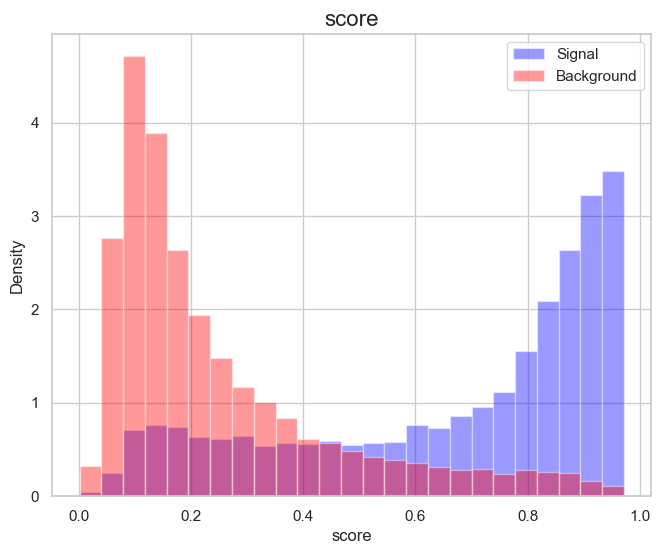

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


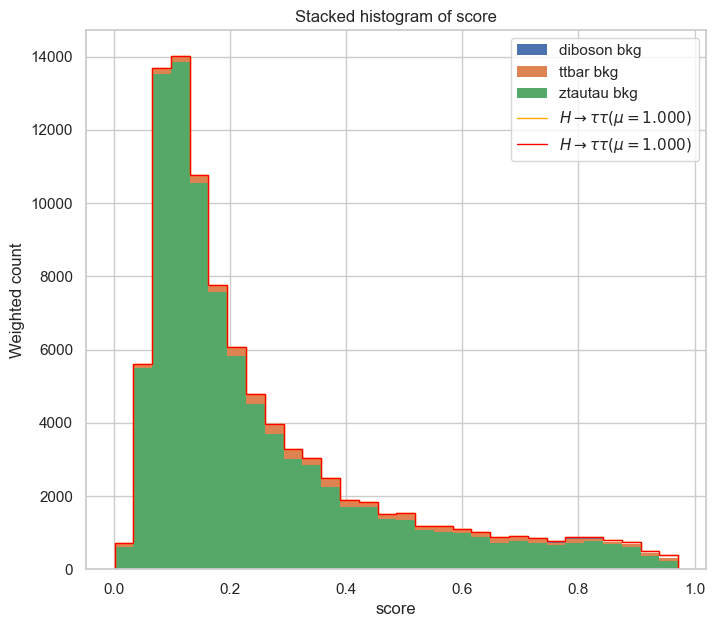

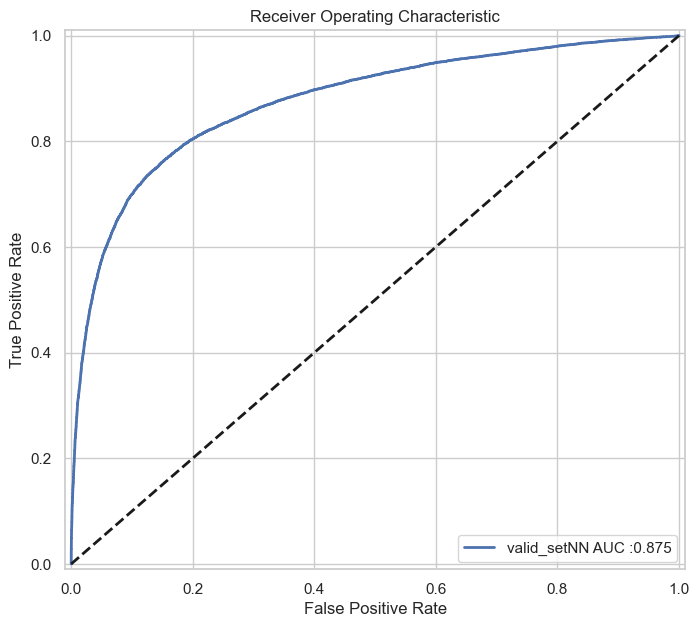

2025-06-05 09:34:39,603 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:34:39,603 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.948197702374027


2025-06-05 09:34:39,966 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:34:39,987 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  667.4139268695262
sum_bkg_weights:  105051.5860731305


2025-06-05 09:34:40,373 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:34:40,397 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  677.2405750643269
sum_bkg_weights:  105041.75942493568


2025-06-05 09:34:40,773 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:34:40,840 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  675.5495223960863
sum_bkg_weights:  105043.45047760391
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
6
Epoch 1/6
1000/1000 - 3s - 3ms/step - accuracy: 0.7854 - loss: 2.0321
Epoch 2/6
1000/1000 - 2s - 2ms/step - accuracy: 0.8050 - loss: 1.9209
Epoch 3/6
1000/1000 - 2s - 2ms/step - accuracy: 0.8098 - loss: 1.8953
Epoch 4/6
1000/1000 - 2s - 2ms/step - accuracy: 0.8120 - loss: 1.8804
Epoch 5/6
1000/1000 - 2s - 2ms/step - accuracy: 0.8147 - loss: 1.8646
Epoch 6/6
1000/1000 - 2s - 2ms/step - accuracy: 0.8159 - loss: 1.8535
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45847,)
score shape after threshold (45847,)
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step
saved_info {'beta': np.float64(17224.92212913036), 'gamma': np.float64(503.183202096179), 'tes_fit': <function tes_fitter.<locals>.fit_function

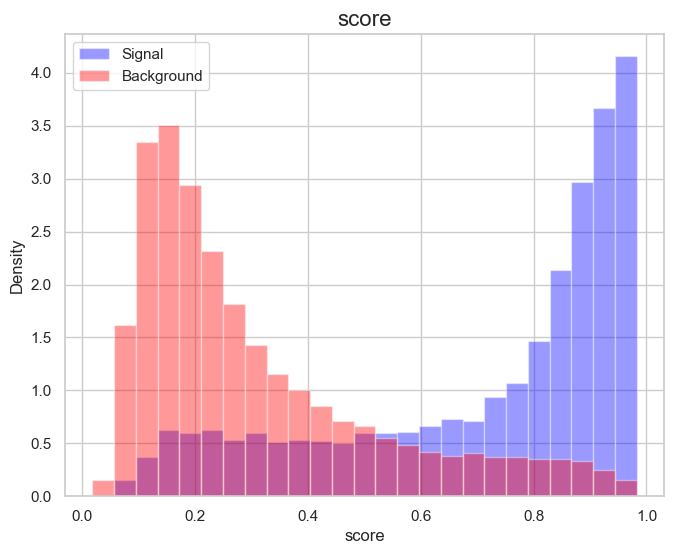

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


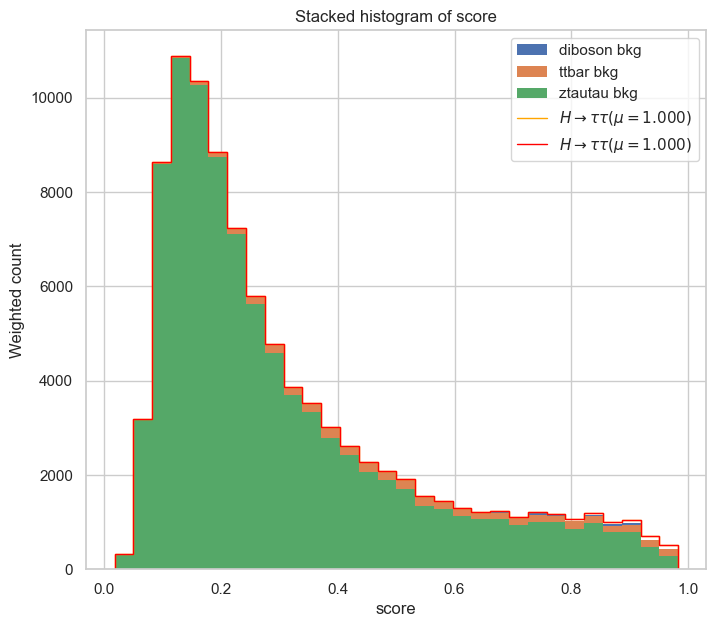

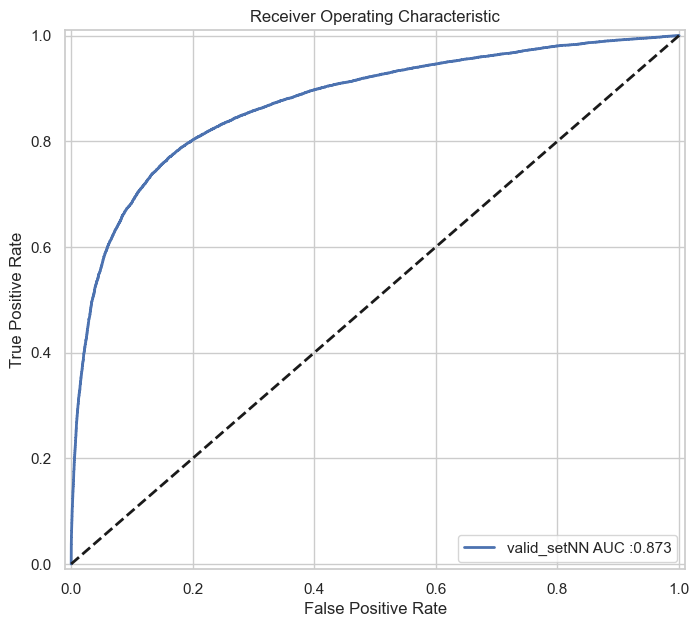

2025-06-05 09:35:07,918 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:35:07,928 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.677078788334532


2025-06-05 09:35:08,288 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:35:08,304 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  661.0146093388855
sum_bkg_weights:  105057.98539066108


2025-06-05 09:35:08,663 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:35:08,692 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  673.58235346988
sum_bkg_weights:  105045.41764653014


2025-06-05 09:35:09,067 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:35:09,142 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  685.727778086348
sum_bkg_weights:  105033.27222191368
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
7
Epoch 1/7
1000/1000 - 3s - 3ms/step - accuracy: 0.7860 - loss: 2.0350
Epoch 2/7
1000/1000 - 2s - 2ms/step - accuracy: 0.8056 - loss: 1.9081
Epoch 3/7
1000/1000 - 2s - 2ms/step - accuracy: 0.8115 - loss: 1.8786
Epoch 4/7
1000/1000 - 2s - 2ms/step - accuracy: 0.8141 - loss: 1.8640
Epoch 5/7
1000/1000 - 2s - 2ms/step - accuracy: 0.8173 - loss: 1.8502
Epoch 6/7
1000/1000 - 2s - 2ms/step - accuracy: 0.8182 - loss: 1.8424
Epoch 7/7
1000/1000 - 2s - 2ms/step - accuracy: 0.8184 - loss: 1.8322
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45869,)
score shape after threshold (45869,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(18160.652539247978), 'gamma': np.float64(516.33

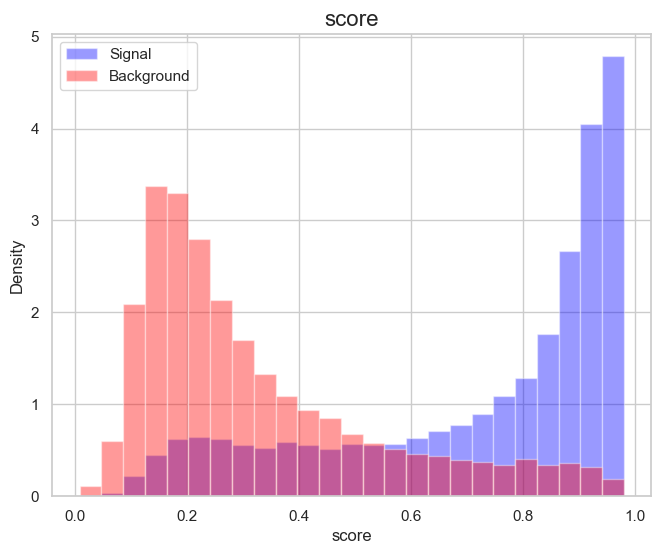

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


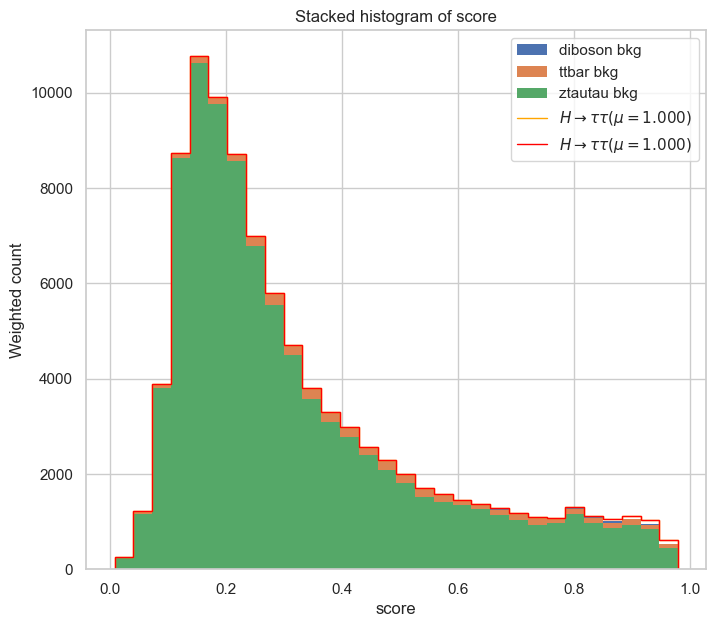

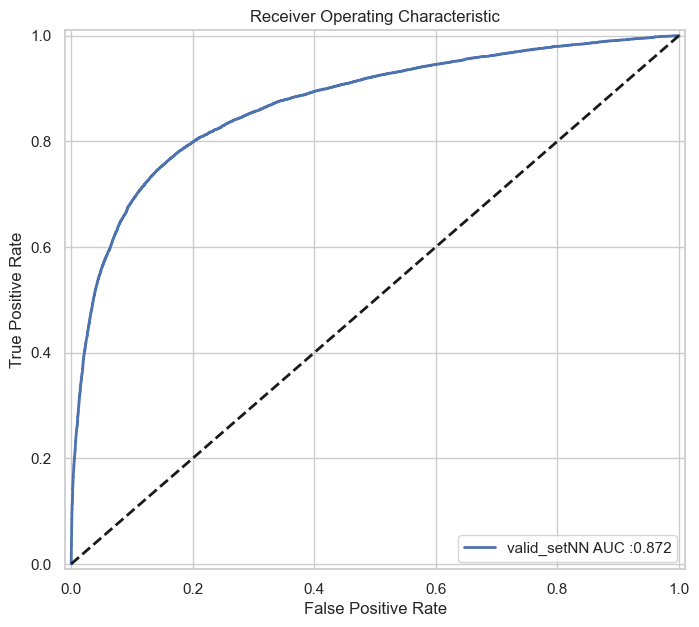

2025-06-05 09:35:37,769 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:35:37,776 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.104780667301963


2025-06-05 09:35:38,135 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:35:38,155 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  661.876816355343
sum_bkg_weights:  105057.12318364468


2025-06-05 09:35:38,518 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:35:38,551 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  686.1855028805795
sum_bkg_weights:  105032.81449711944


2025-06-05 09:35:38,917 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:35:38,978 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.2582643034445
sum_bkg_weights:  105046.74173569653
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
8
Epoch 1/8
1000/1000 - 3s - 3ms/step - accuracy: 0.7861 - loss: 2.0305
Epoch 2/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8069 - loss: 1.9046
Epoch 3/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8116 - loss: 1.8792
Epoch 4/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8140 - loss: 1.8597
Epoch 5/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8171 - loss: 1.8491
Epoch 6/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8196 - loss: 1.8346
Epoch 7/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8191 - loss: 1.8296
Epoch 8/8
1000/1000 - 2s - 2ms/step - accuracy: 0.8217 - loss: 1.8179
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step
score shape before threshold (45823,)
score shape after threshold (45823,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step


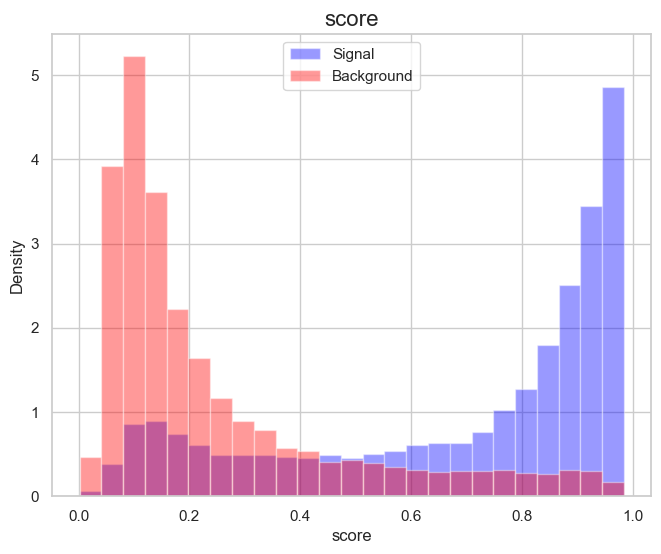

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


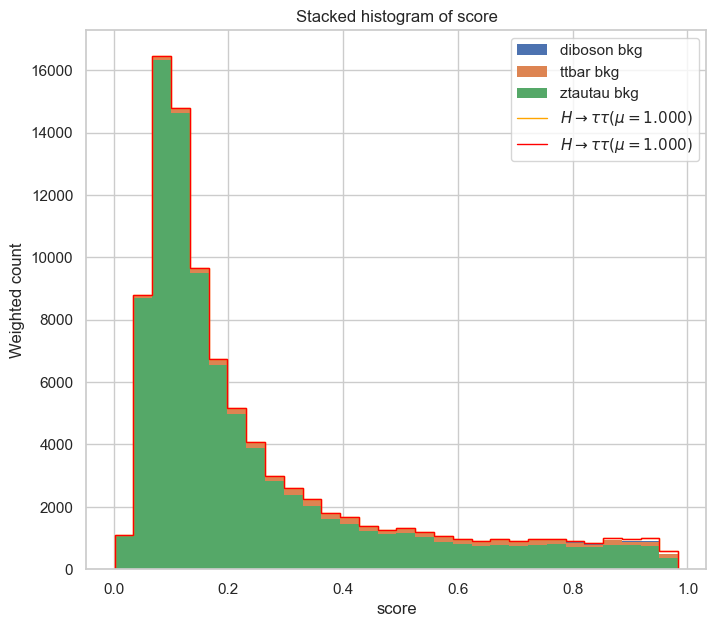

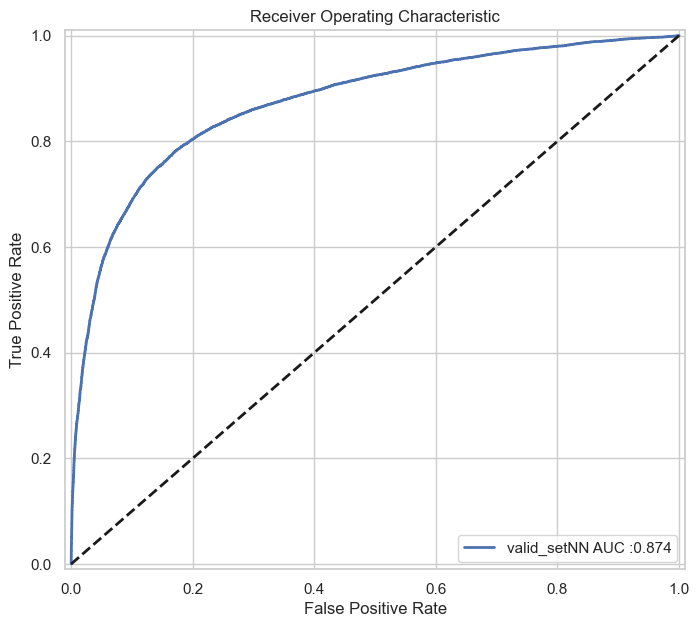

2025-06-05 09:36:09,251 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:36:09,251 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.191851144653764


2025-06-05 09:36:09,619 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:36:09,635 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  677.3456054878009
sum_bkg_weights:  105041.65439451221


2025-06-05 09:36:10,042 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:36:10,075 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  668.8477023583566
sum_bkg_weights:  105050.15229764165


2025-06-05 09:36:10,543 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:36:10,599 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  674.0018587086013
sum_bkg_weights:  105044.99814129143
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
9
Epoch 1/9
1000/1000 - 3s - 3ms/step - accuracy: 0.7836 - loss: 2.0610
Epoch 2/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8107 - loss: 1.9157
Epoch 3/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8139 - loss: 1.8817
Epoch 4/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8176 - loss: 1.8656
Epoch 5/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8186 - loss: 1.8559
Epoch 6/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8212 - loss: 1.8427
Epoch 7/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8222 - loss: 1.8344
Epoch 8/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8237 - loss: 1.8252
Epoch 9/9
1000/1000 - 2s - 2ms/step - accuracy: 0.8235 - loss: 1.8163
1430/1430 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45755,)
score shape after threshold (45755,)
1430/1430 ━━━━━━━━━━━━━

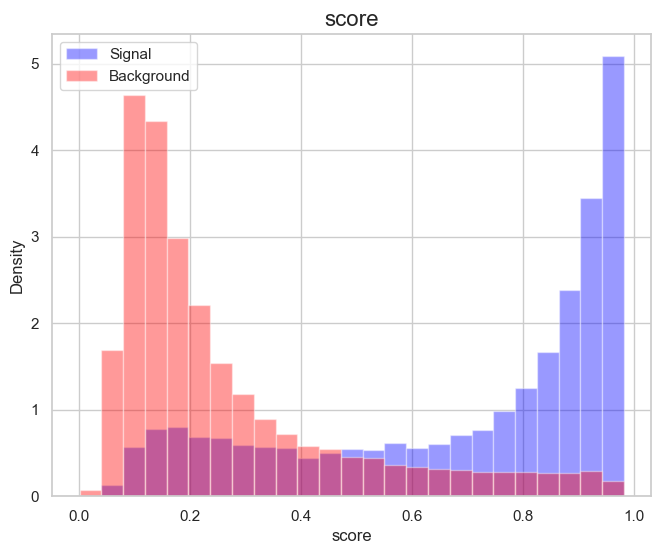

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


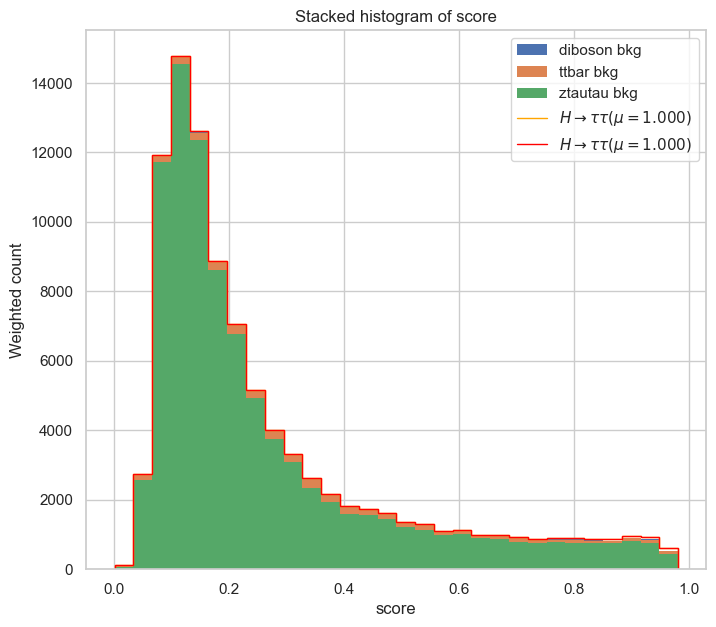

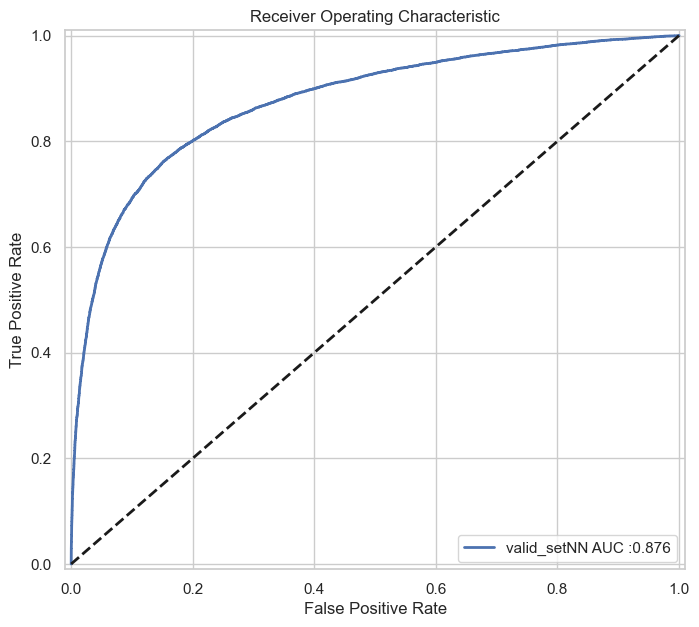

2025-06-05 09:36:44,235 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:36:44,247 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.554362524895036


2025-06-05 09:36:44,648 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:36:44,671 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  677.6496534560296
sum_bkg_weights:  105041.35034654396


2025-06-05 09:36:45,053 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:36:45,086 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  669.0208436496838
sum_bkg_weights:  105049.97915635035


2025-06-05 09:36:45,554 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:36:45,620 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.524753062162
sum_bkg_weights:  105045.47524693781
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
10
Epoch 1/10
1000/1000 - 3s - 3ms/step - accuracy: 0.7823 - loss: 2.0668
Epoch 2/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8032 - loss: 1.9351
Epoch 3/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8082 - loss: 1.9066
Epoch 4/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8101 - loss: 1.8887
Epoch 5/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8142 - loss: 1.8758
Epoch 6/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8141 - loss: 1.8651
Epoch 7/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8153 - loss: 1.8542
Epoch 8/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8164 - loss: 1.8463
Epoch 9/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8166 - loss: 1.8385
Epoch 10/10
1000/1000 - 2s - 2ms/step - accuracy: 0.8184 - loss: 1.8307
1430/1430 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape befor

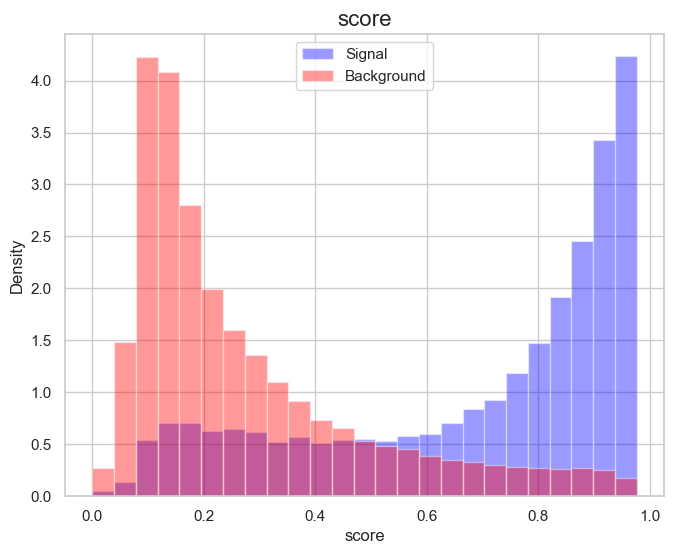

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


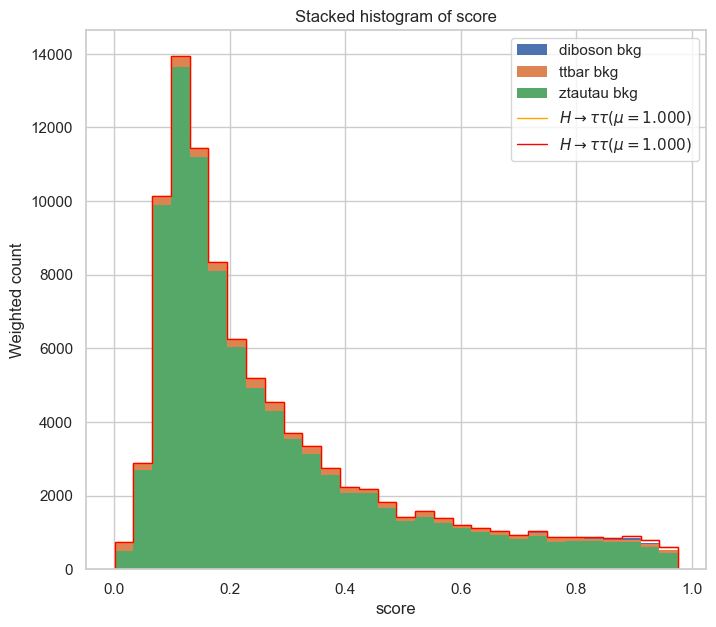

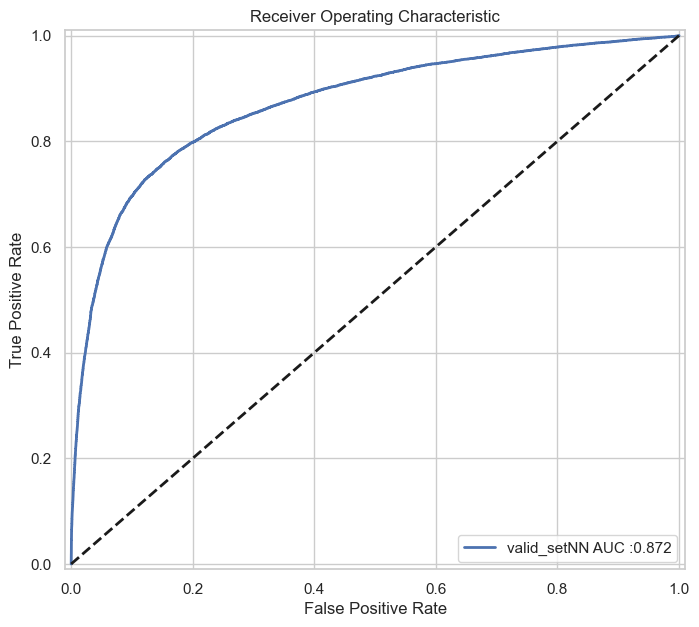

2025-06-05 09:37:20,118 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:37:20,128 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.106243288183359


2025-06-05 09:37:20,550 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:37:20,581 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  684.6270080835935
sum_bkg_weights:  105034.3729919164


2025-06-05 09:37:20,933 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:37:20,972 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  662.8878737543625
sum_bkg_weights:  105056.11212624564


2025-06-05 09:37:21,316 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:37:21,390 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.776835483972
sum_bkg_weights:  105046.22316451602
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
11
Epoch 1/11
1000/1000 - 3s - 3ms/step - accuracy: 0.7882 - loss: 2.0286
Epoch 2/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8087 - loss: 1.9053
Epoch 3/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8128 - loss: 1.8810
Epoch 4/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8132 - loss: 1.8660
Epoch 5/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8167 - loss: 1.8556
Epoch 6/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8189 - loss: 1.8436
Epoch 7/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8200 - loss: 1.8326
Epoch 8/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8207 - loss: 1.8227
Epoch 9/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8213 - loss: 1.8175
Epoch 10/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8218 - loss: 1.8088
Epoch 11/11
1000/1000 - 2s - 2ms/step - accuracy: 0.8215 - l

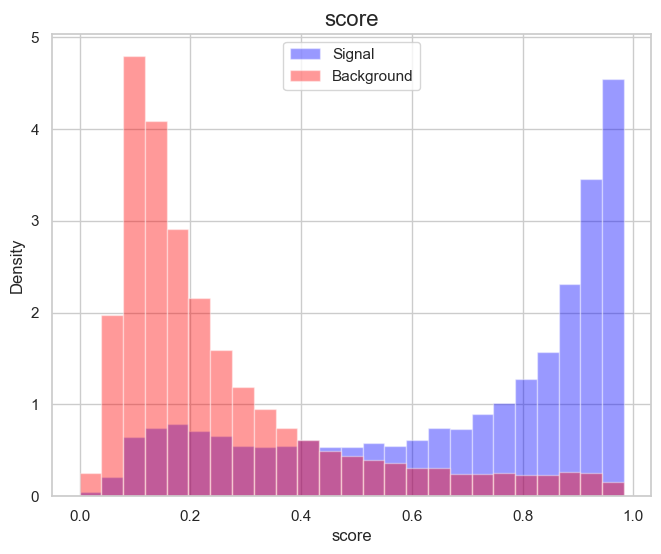

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


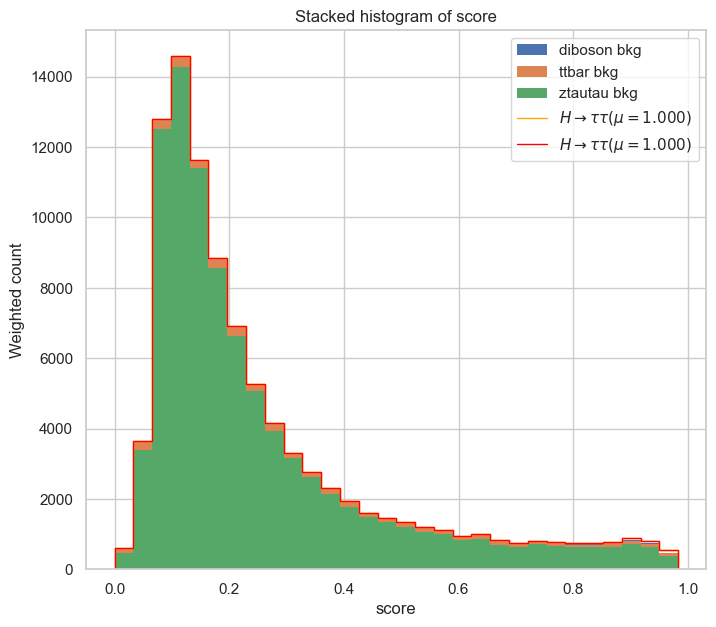

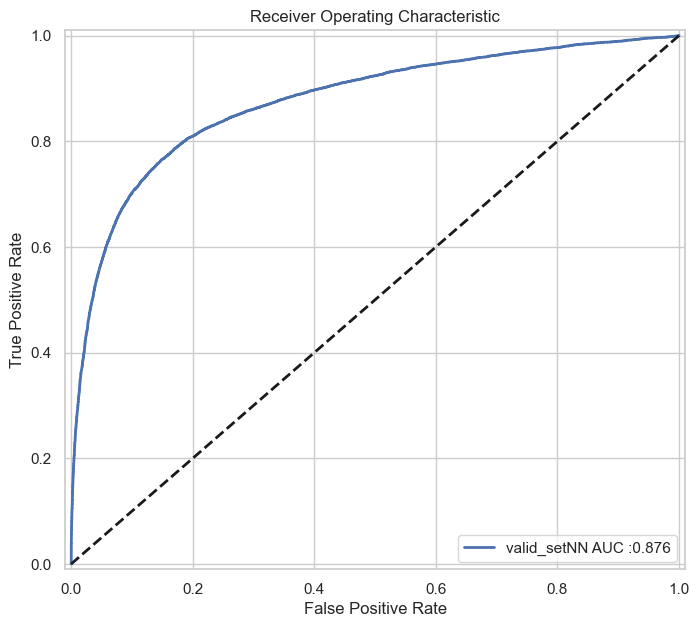

2025-06-05 09:37:57,560 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:37:57,560 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.6244009302124


2025-06-05 09:37:57,940 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:37:57,955 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  668.7257770680291
sum_bkg_weights:  105050.27422293197


2025-06-05 09:37:58,355 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:37:58,386 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  677.6600664364591
sum_bkg_weights:  105041.33993356353


2025-06-05 09:37:58,735 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:37:58,809 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.8109371985203
sum_bkg_weights:  105045.18906280152
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
12
Epoch 1/12
1000/1000 - 3s - 3ms/step - accuracy: 0.7897 - loss: 2.0192
Epoch 2/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8084 - loss: 1.9079
Epoch 3/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8133 - loss: 1.8813
Epoch 4/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8159 - loss: 1.8690
Epoch 5/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8181 - loss: 1.8514
Epoch 6/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8198 - loss: 1.8396
Epoch 7/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8202 - loss: 1.8316
Epoch 8/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8224 - loss: 1.8237
Epoch 9/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8219 - loss: 1.8126
Epoch 10/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8237 - loss: 1.8053
Epoch 11/12
1000/1000 - 2s - 2ms/step - accuracy: 0.8251 - 

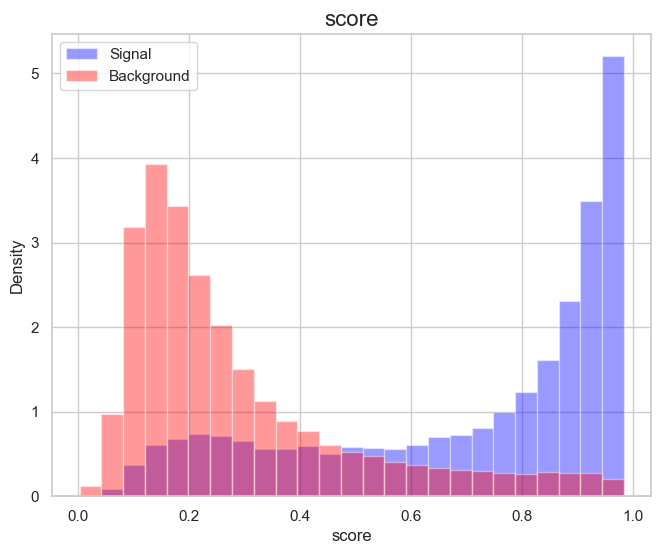

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


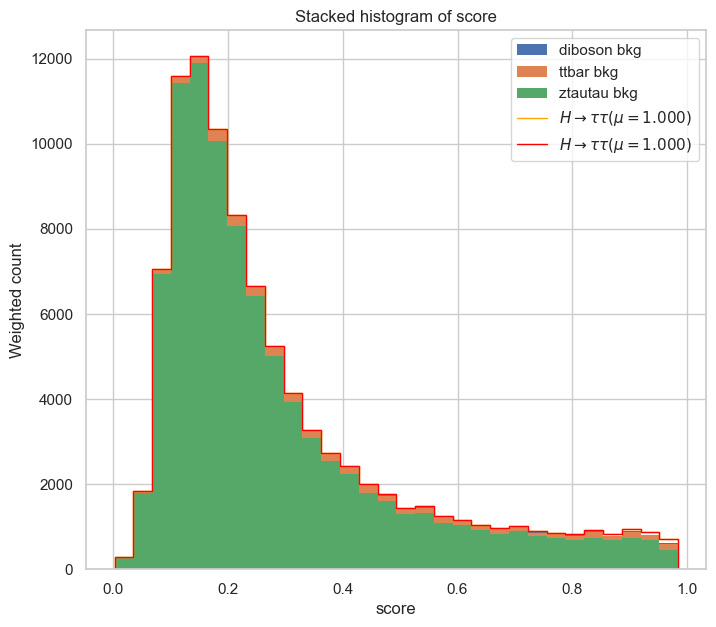

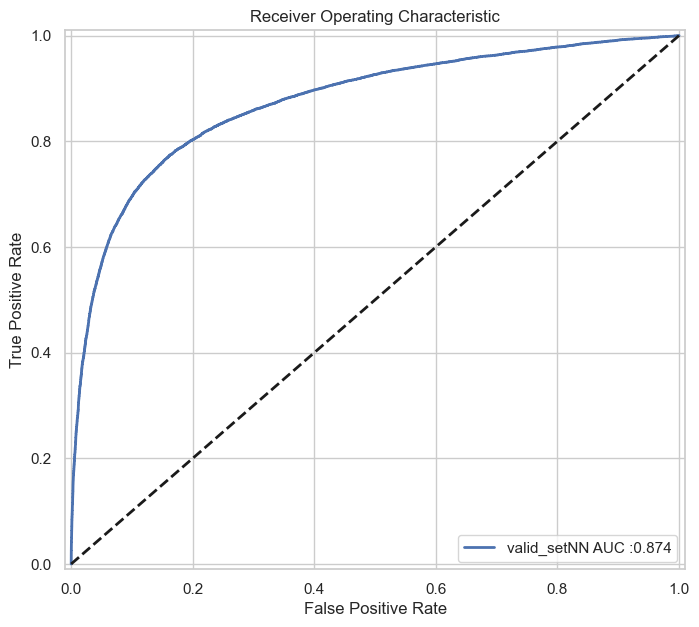

2025-06-05 09:38:37,103 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:38:37,108 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.406729497758396


2025-06-05 09:38:37,470 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:38:37,499 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  673.8630548106164
sum_bkg_weights:  105045.13694518937


2025-06-05 09:38:37,857 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:38:37,886 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  667.6709316476826
sum_bkg_weights:  105051.32906835232


2025-06-05 09:38:38,236 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:38:38,310 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  678.6727718041489
sum_bkg_weights:  105040.32722819583
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
13
Epoch 1/13
1000/1000 - 3s - 3ms/step - accuracy: 0.7890 - loss: 2.0162
Epoch 2/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8087 - loss: 1.8964
Epoch 3/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8142 - loss: 1.8663
Epoch 4/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8159 - loss: 1.8538
Epoch 5/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8183 - loss: 1.8421
Epoch 6/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8188 - loss: 1.8251
Epoch 7/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8200 - loss: 1.8186
Epoch 8/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8224 - loss: 1.8134
Epoch 9/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8234 - loss: 1.8068
Epoch 10/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8226 - loss: 1.7949
Epoch 11/13
1000/1000 - 2s - 2ms/step - accuracy: 0.8250 - 

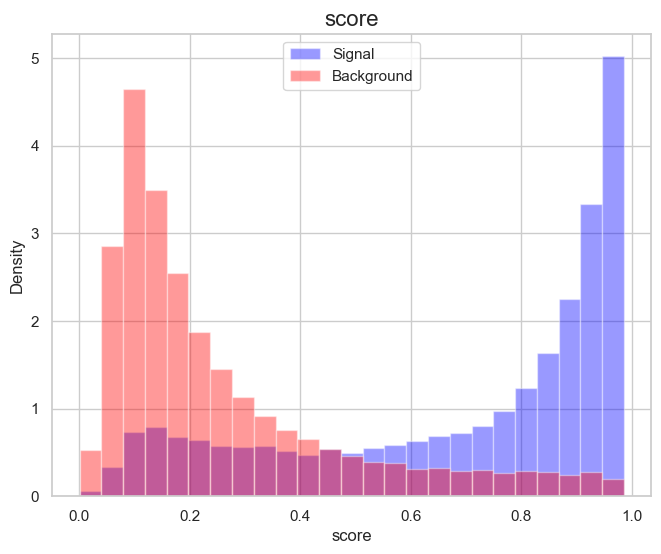

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


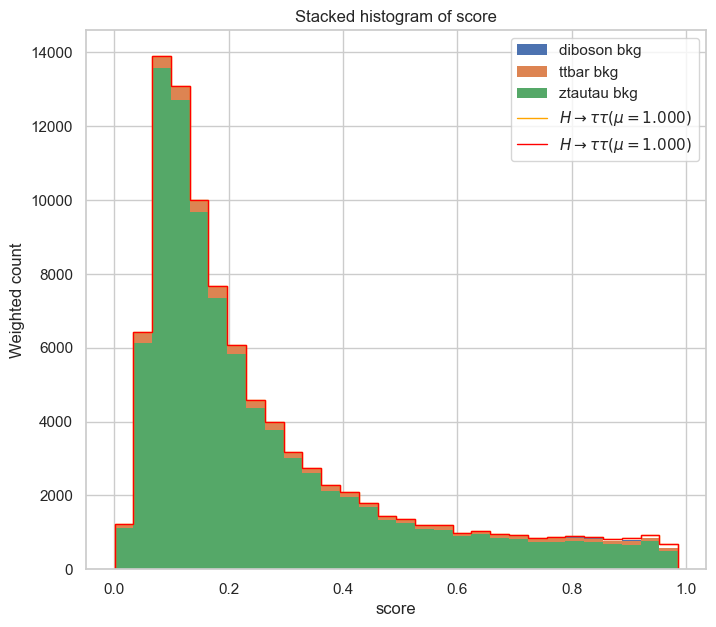

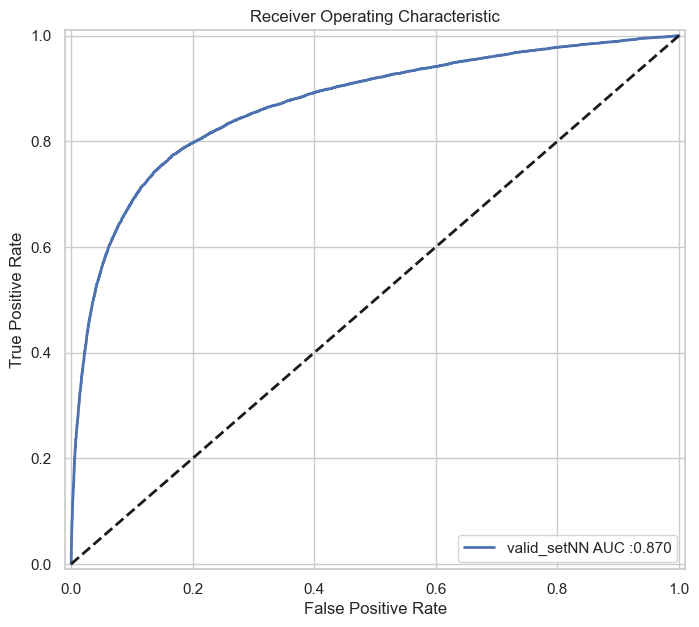

2025-06-05 09:39:19,301 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:39:19,317 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.645437068075004


2025-06-05 09:39:19,672 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:39:19,701 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  673.0126574517267
sum_bkg_weights:  105045.9873425483


2025-06-05 09:39:20,056 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:39:20,076 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.738824556427
sum_bkg_weights:  105044.26117544356


2025-06-05 09:39:20,434 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:39:20,501 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.4271846366046
sum_bkg_weights:  105046.5728153634
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
14
Epoch 1/14
1000/1000 - 3s - 3ms/step - accuracy: 0.7841 - loss: 2.0523
Epoch 2/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8056 - loss: 1.9248
Epoch 3/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8116 - loss: 1.8943
Epoch 4/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8132 - loss: 1.8739
Epoch 5/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8148 - loss: 1.8692
Epoch 6/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8173 - loss: 1.8533
Epoch 7/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8187 - loss: 1.8431
Epoch 8/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8195 - loss: 1.8343
Epoch 9/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8201 - loss: 1.8278
Epoch 10/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8208 - loss: 1.8188
Epoch 11/14
1000/1000 - 2s - 2ms/step - accuracy: 0.8234 - l

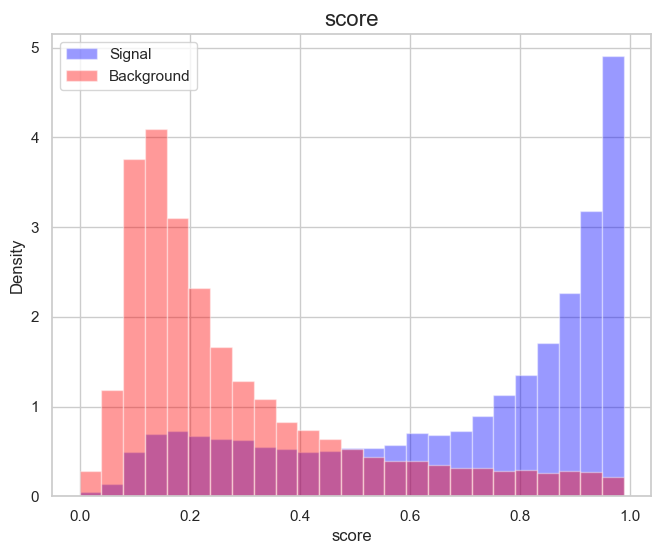

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


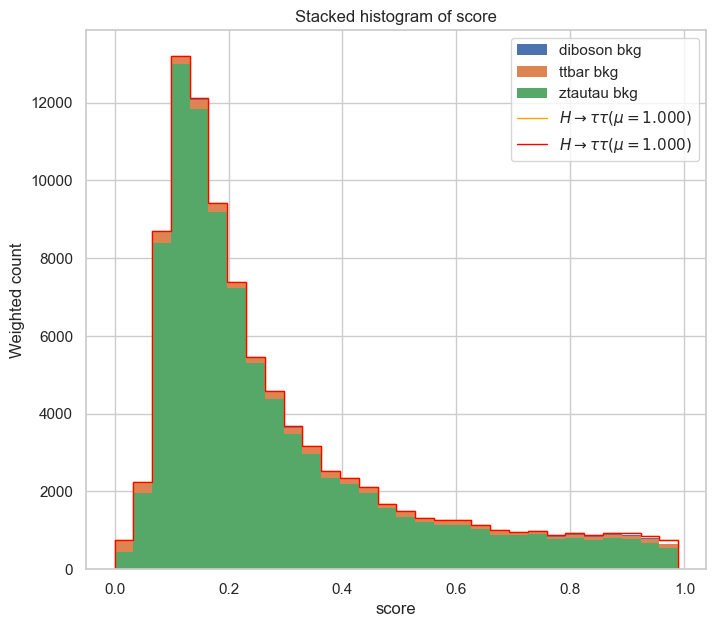

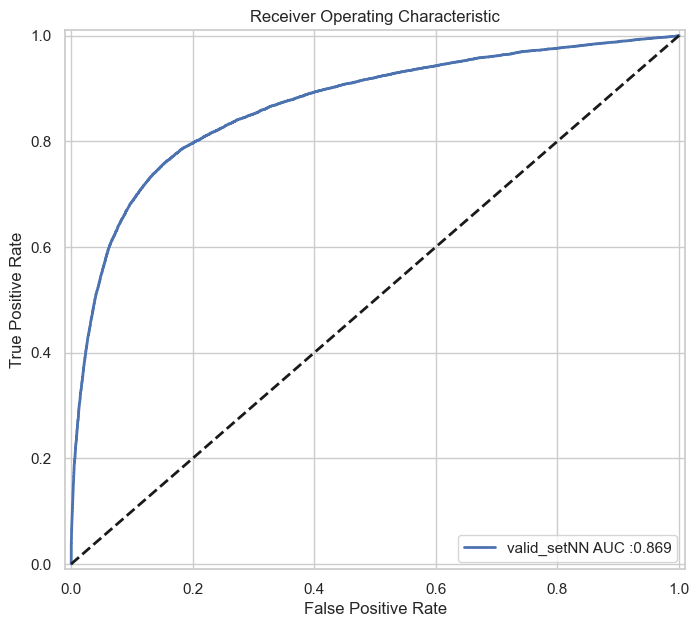

2025-06-05 09:40:03,172 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:40:03,172 - HiggsML.datasets     - INFO     - Selected train size: 50000


7.199070177769371


2025-06-05 09:40:03,623 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:40:03,650 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.3347048732487
sum_bkg_weights:  105042.66529512669


2025-06-05 09:40:04,049 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:40:04,074 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.020726242461
sum_bkg_weights:  105044.97927375755


2025-06-05 09:40:04,456 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:40:04,520 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  669.8322880004583
sum_bkg_weights:  105049.1677119995
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
15
Epoch 1/15
1000/1000 - 3s - 3ms/step - accuracy: 0.7804 - loss: 2.0620
Epoch 2/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8056 - loss: 1.9294
Epoch 3/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8120 - loss: 1.8928
Epoch 4/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8150 - loss: 1.8770
Epoch 5/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8171 - loss: 1.8664
Epoch 6/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8170 - loss: 1.8558
Epoch 7/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8191 - loss: 1.8428
Epoch 8/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8198 - loss: 1.8366
Epoch 9/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8224 - loss: 1.8254
Epoch 10/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8233 - loss: 1.8198
Epoch 11/15
1000/1000 - 2s - 2ms/step - accuracy: 0.8227 - l

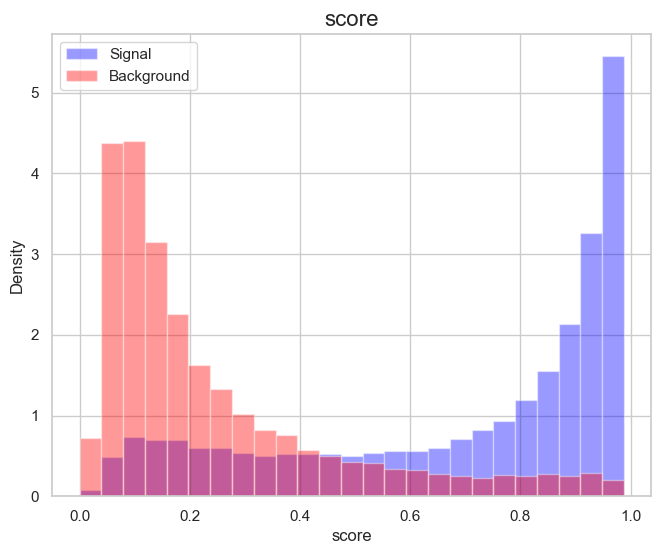

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


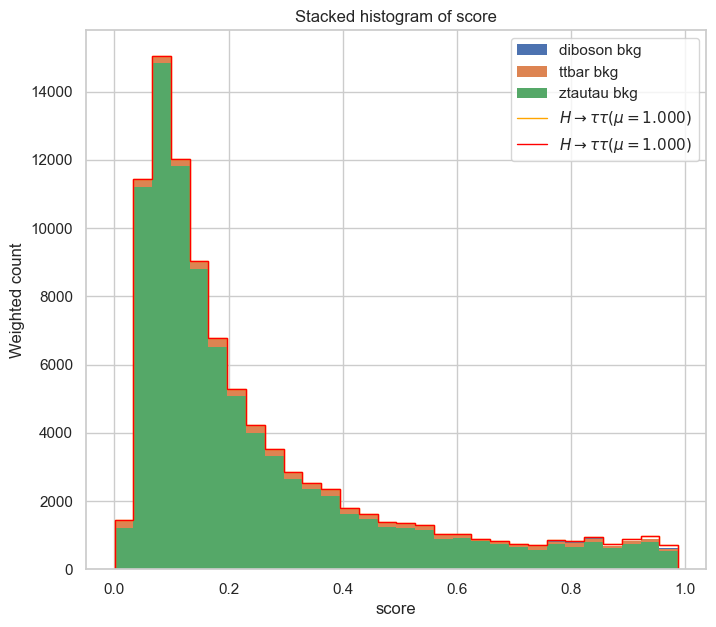

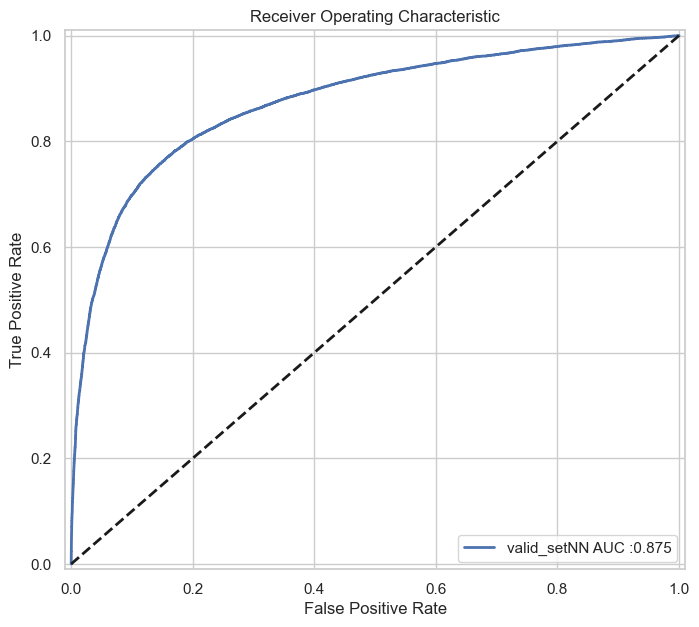

8.155664099673333


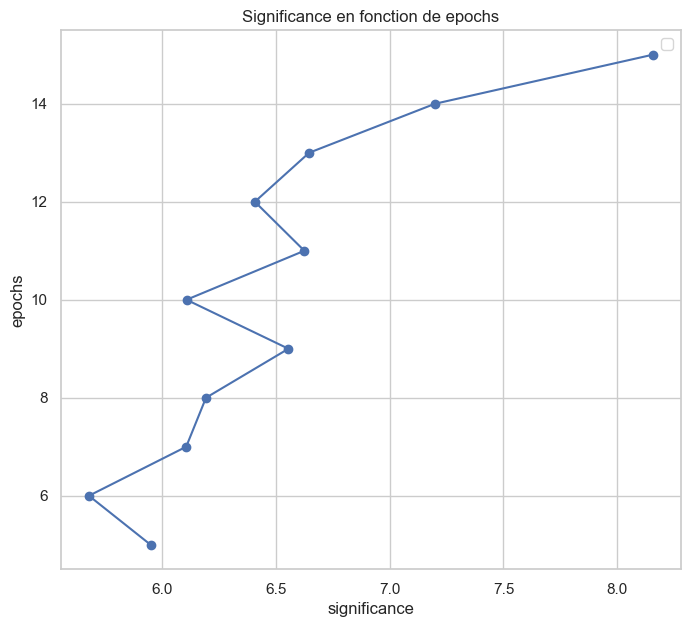

(np.float64(8.155664099673333), 15)

In [14]:
optimization(data_set)